# Creating two datasets (linear and non-linear)

In [2]:
import numpy as np
import pandas as pd

# Set seed for reproducibility
np.random.seed(42)

# Linear Classification Dataset
X1_linear = np.random.uniform(-5, 5, 200)
X2_linear = np.random.uniform(-5, 5, 200)
# Class -1 if below the line X2 = -X1 + 1, 1 otherwise
y_linear = np.where(X2_linear > -X1_linear + 1, 1, -1)
X_linear = pd.DataFrame({'X1': X1_linear, 'X2': X2_linear})

# Non-linear Classification Dataset
X1_nonlinear = np.random.uniform(-5, 5, 200)
X2_nonlinear = np.random.uniform(-5, 5, 200)
# Class 1 if inside circle of radius 3, -1 otherwise
y_nonlinear = np.where(X1_nonlinear**2 + X2_nonlinear**2 < 9, 1, -1)
X_nonlinear = pd.DataFrame({'X1': X1_nonlinear, 'X2': X2_nonlinear})

# Concatenating datasets
X_combined = pd.concat([X_linear, X_nonlinear], ignore_index=True)
y_combined = np.hstack((y_linear, y_nonlinear))

# Combined dataset as DataFrame
combined_dataset = X_combined.copy()
combined_dataset['class'] = y_combined

print(combined_dataset.head())

         X1        X2  class
0 -1.254599  1.420316     -1
1  4.507143 -4.158600     -1
2  2.319939 -3.383713     -1
3  0.986585  3.985542      1
4 -3.439814  1.064291     -1


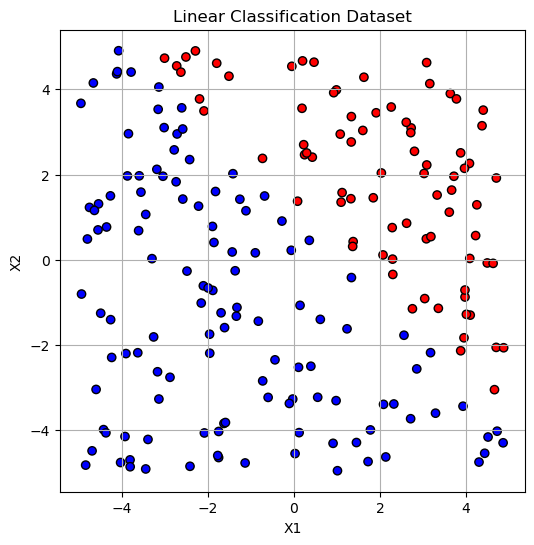

In [3]:
import matplotlib.pyplot as plt

# Plotting the Linear Classification Dataset
plt.figure(figsize=(6, 6))
plt.scatter(X_linear['X1'], X_linear['X2'],
            c=y_linear, cmap='bwr', edgecolor='k')
plt.title("Linear Classification Dataset")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.show()

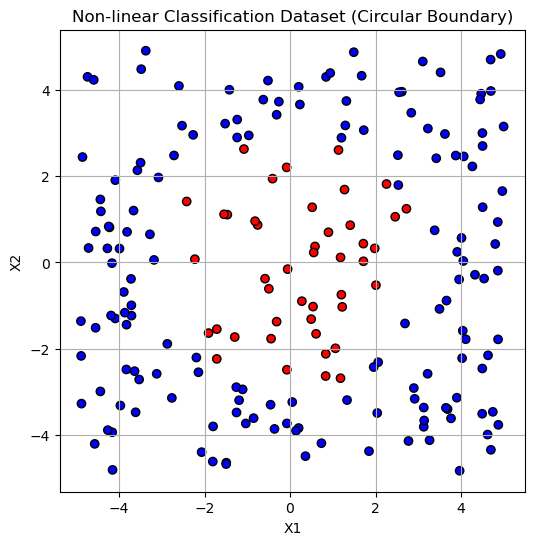

In [4]:
# Plotting the Non-linear Classification Dataset
plt.figure(figsize=(6, 6))
plt.scatter(X_nonlinear['X1'], X_nonlinear['X2'],
            c=y_nonlinear, cmap='bwr', edgecolor='k')
plt.title("Non-linear Classification Dataset (Circular Boundary)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.show()

# Creating the perceptron module from scratch

In [25]:
class perceptron(object):
    def __init__(self, lr = 0.01, n_iter = 10):
        self.lr = lr
        self.n_iter = n_iter

    def weighted_sum(self, X):
        return np.dot(X,self.w[1:]) + self.w[0] # weighted sum of input

    def predict(self, X):
        return np.where(self.weighted_sum(X) > 0.0, 1, -1) # Prediction function (Step function: 1 or -1), strictly confine points to either side of the boundary, no points on the line

    def fit(self, X, y):
        self.w = np.zeros(1 + X.shape[1]) # initialize the weight vector
        self.errors = []
        print(f"weights: {self.w}")

        for i in range(self.n_iter):
            error = 0
            for xi, yi in zip(X,y):
                yi_pred = self.predict(xi)
                loss = yi-yi_pred
                update = loss*self.lr
                self.w[1:] = self.w[1:] + update*xi # update all the weights except for the bias
                self.w[0] = self.w[0] + update
                error += loss
            self.errors.append(error)
            if(i % 10 == 0):
                print(f"loss at epoch: {i}: {error}\n")
                print(f"weights at epoch: {i}: {self.w}")
        print(f"list of errors after training: {self.errors}")
        
        # Define the range for plotting
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx = np.linspace(x_min, x_max, 100)
        
        # Calculate decision boundary: w1*x1 + w2*x2 + w0 = 0 because the output can either be 1 or -1 but only one class or n points lie on 0
        w1, w2 = self.w[1], self.w[2]
        w0 = self.w[0]
        
        # Decision boundary line: x2 = -(w1/w2)*x1 - (w0/w2)
        yy = -(w1 / w2) * xx - (w0 / w2)
        
        # Plot
        plt.figure(figsize=(8, 6))
        plt.plot(xx, yy, 'k--', label="Decision Boundary")
        
        # Plot data points
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', s=50)
        plt.xlabel("X1")
        plt.ylabel("X2")
        plt.title("Perceptron Decision Boundary")
        plt.legend()
        plt.grid(True)
        plt.show()

In [27]:
X_linear = np.asarray(X_linear)
y_linear = np.asarray(y_linear)
X_nonlinear = np.asarray(X_nonlinear)
y_nonlinear = np.asarray(y_nonlinear)

In [29]:
from sklearn.model_selection import train_test_split
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(X_linear,y_linear,random_state = 42, test_size = 0.2)
X_train_nonlinear, X_test_nonlinear, y_train_nonlinear, y_test_nonlinear = train_test_split(X_nonlinear,y_nonlinear,random_state = 42, test_size = 0.2)

In [31]:
model_0_linear = perceptron(n_iter = 100, lr = 0.01)
model_0_nonlinear = perceptron(n_iter = 100, lr = 0.01)

In [33]:
from sklearn.metrics import accuracy_score, f1_score

weights: [0. 0. 0.]
loss at epoch: 0: -16

weights at epoch: 0: [-0.16        0.14127029  0.12331335]
loss at epoch: 10: 0

weights at epoch: 10: [-0.18        0.16686382  0.1697707 ]
loss at epoch: 20: 0

weights at epoch: 20: [-0.18        0.16686382  0.1697707 ]
loss at epoch: 30: 0

weights at epoch: 30: [-0.18        0.16686382  0.1697707 ]
loss at epoch: 40: 0

weights at epoch: 40: [-0.18        0.16686382  0.1697707 ]
loss at epoch: 50: 0

weights at epoch: 50: [-0.18        0.16686382  0.1697707 ]
loss at epoch: 60: 0

weights at epoch: 60: [-0.18        0.16686382  0.1697707 ]
loss at epoch: 70: 0

weights at epoch: 70: [-0.18        0.16686382  0.1697707 ]
loss at epoch: 80: 0

weights at epoch: 80: [-0.18        0.16686382  0.1697707 ]
loss at epoch: 90: 0

weights at epoch: 90: [-0.18        0.16686382  0.1697707 ]
list of errors after training: [-16, -2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

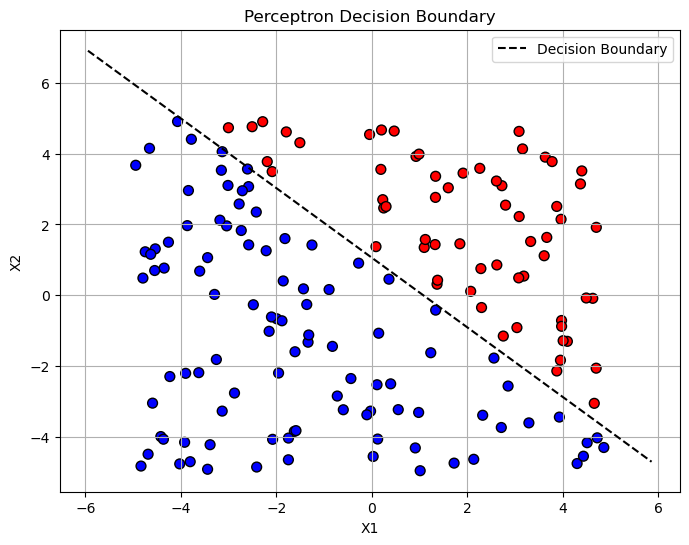

Linear data
accuracy: 1.0
f1: 1.0


In [35]:
model_0_linear.fit(X_train_linear,y_train_linear)
y_pred_linear = model_0_linear.predict(X_test_linear)
acc_linear = accuracy_score(y_test_linear,y_pred_linear)
f1_linear = f1_score(y_test_linear,y_pred_linear)
print(f"Linear data\naccuracy: {acc_linear}\nf1: {f1_linear}")

weights: [0. 0. 0.]
loss at epoch: 0: -8

weights at epoch: 0: [-0.08       -0.06777509 -0.00749375]
loss at epoch: 10: 0

weights at epoch: 10: [-0.08       -0.09108308 -0.00129203]
loss at epoch: 20: 4

weights at epoch: 20: [-0.08       -0.08643137  0.01541988]
loss at epoch: 30: -2

weights at epoch: 30: [-0.12       -0.12888256 -0.0088245 ]
loss at epoch: 40: -8

weights at epoch: 40: [-0.16       -0.10801111 -0.06808935]
loss at epoch: 50: -4

weights at epoch: 50: [-0.14       -0.10407635  0.00688046]
loss at epoch: 60: 4

weights at epoch: 60: [-0.06       -0.09546357  0.00225314]
loss at epoch: 70: 0

weights at epoch: 70: [-0.12       -0.11547924 -0.02515041]
loss at epoch: 80: 0

weights at epoch: 80: [-0.12       -0.13621264 -0.00173958]
loss at epoch: 90: 4

weights at epoch: 90: [-0.12       -0.12551194 -0.00863565]
list of errors after training: [-8, -4, 2, -2, 0, 0, 0, 2, -4, 6, 0, 4, -12, 4, 2, 4, -6, -2, 0, 2, 4, -2, -2, 0, 0, 2, -4, 2, 4, -2, -2, 2, -2, 2, -4, 6, 0, 

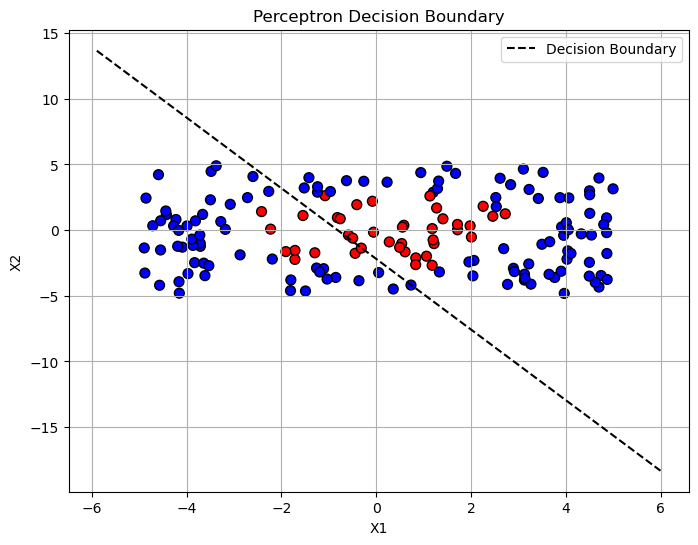

Non-linear data
accuracy: 0.475
f1: 0.16


In [36]:
model_0_nonlinear.fit(X_train_nonlinear,y_train_nonlinear)
y_pred_nonlinear = model_0_nonlinear.predict(X_test_nonlinear)
acc_nonlinear = accuracy_score(y_test_nonlinear,y_pred_nonlinear)
f1_nonlinear = f1_score(y_test_nonlinear,y_pred_nonlinear)
print(f"Non-linear data\naccuracy: {acc_nonlinear}\nf1: {f1_nonlinear}")